<a href="https://colab.research.google.com/github/arijit-27/arijit-27/blob/main/FoodNutritionRecomender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv(r"/content/FOOD-DATA-GROUP1.csv")
df2 = pd.read_csv(r"/content/FOOD-DATA-GROUP2.csv")
df3 = pd.read_csv(r"/content/FOOD-DATA-GROUP3.csv")
df4 = pd.read_csv(r"/content/FOOD-DATA-GROUP4.csv")
df5 = pd.read_csv(r"/content/FOOD-DATA-GROUP5.csv")

In [5]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [6]:
df.shape

(1673, 37)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

In [8]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [10]:
df.shape[0] - df["food"].nunique()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df[df.duplicated()]

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density


In [13]:
df[df["food"] == "nectarine"]

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
870,nectarine,66,0.5,0.066,0.1,0.2,15.8,11.8,1.6,2.6,...,0.081,9.0,0.1,0.4,13.5,0.002,39.0,301.5,0.0,20.735


In [14]:
df[df["food"] == "goose meat raw"]

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
1437,goose meat raw,6077,550.7,160.2,291.1,61.6,0.0,0.0,259.8,0.0,...,196.6,4.4,41.0,294.8,0.3,3832.9,5045.0,0.2,28.2,1117.2


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df["food"] == "goose meat raw"]

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
1437,goose meat raw,6077,550.7,160.2,291.1,61.6,0.0,0.0,259.8,0.0,...,196.6,4.4,41.0,294.8,0.3,3832.9,5045.0,0.2,28.2,1117.2


In [17]:
df.shape

(1673, 35)

In [18]:
df.isnull().sum()

,0
food,0
Caloric Value,0
Fat,0
Saturated Fats,0
Monounsaturated Fats,0
Polyunsaturated Fats,0
Carbohydrates,0
Sugars,0
Protein,0
Dietary Fiber,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  1673 non-null   object 
 1   Caloric Value         1673 non-null   int64  
 2   Fat                   1673 non-null   float64
 3   Saturated Fats        1673 non-null   float64
 4   Monounsaturated Fats  1673 non-null   float64
 5   Polyunsaturated Fats  1673 non-null   float64
 6   Carbohydrates         1673 non-null   float64
 7   Sugars                1673 non-null   float64
 8   Protein               1673 non-null   float64
 9   Dietary Fiber         1673 non-null   float64
 10  Cholesterol           1673 non-null   float64
 11  Sodium                1673 non-null   float64
 12  Water                 1673 non-null   float64
 13  Vitamin A             1673 non-null   float64
 14  Vitamin B1            1673 non-null   float64
 15  Vitamin B11          

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,1673.0,266.614465,430.489571,0.0,62.000,150.000,328.000,6077.0
Fat,1673.0,12.154604,31.968318,0.0,0.400,3.200,11.600,550.7
Saturated Fats,1673.0,4.829194,22.099630,0.0,0.078,0.800,3.800,672.0
Monounsaturated Fats,1673.0,5.116770,14.893743,0.0,0.078,1.000,4.300,291.1
Polyunsaturated Fats,1673.0,2.349628,7.436573,0.0,0.079,0.500,2.000,188.0
Carbohydrates,1673.0,19.805454,31.669880,0.0,0.089,5.900,29.000,390.2
Sugars,1673.0,5.044491,15.062886,0.0,0.000,0.000,3.400,291.5
Protein,1673.0,17.664874,37.611615,0.0,1.200,5.600,20.000,560.3
Dietary Fiber,1673.0,2.304008,6.042151,0.0,0.000,0.000,1.800,76.5
Cholesterol,1673.0,86.891207,457.974169,0.0,0.000,2.400,60.500,10509.0


In [21]:
columns_to_plot = df.columns.to_list()

In [22]:
columns_to_plot.remove("food")

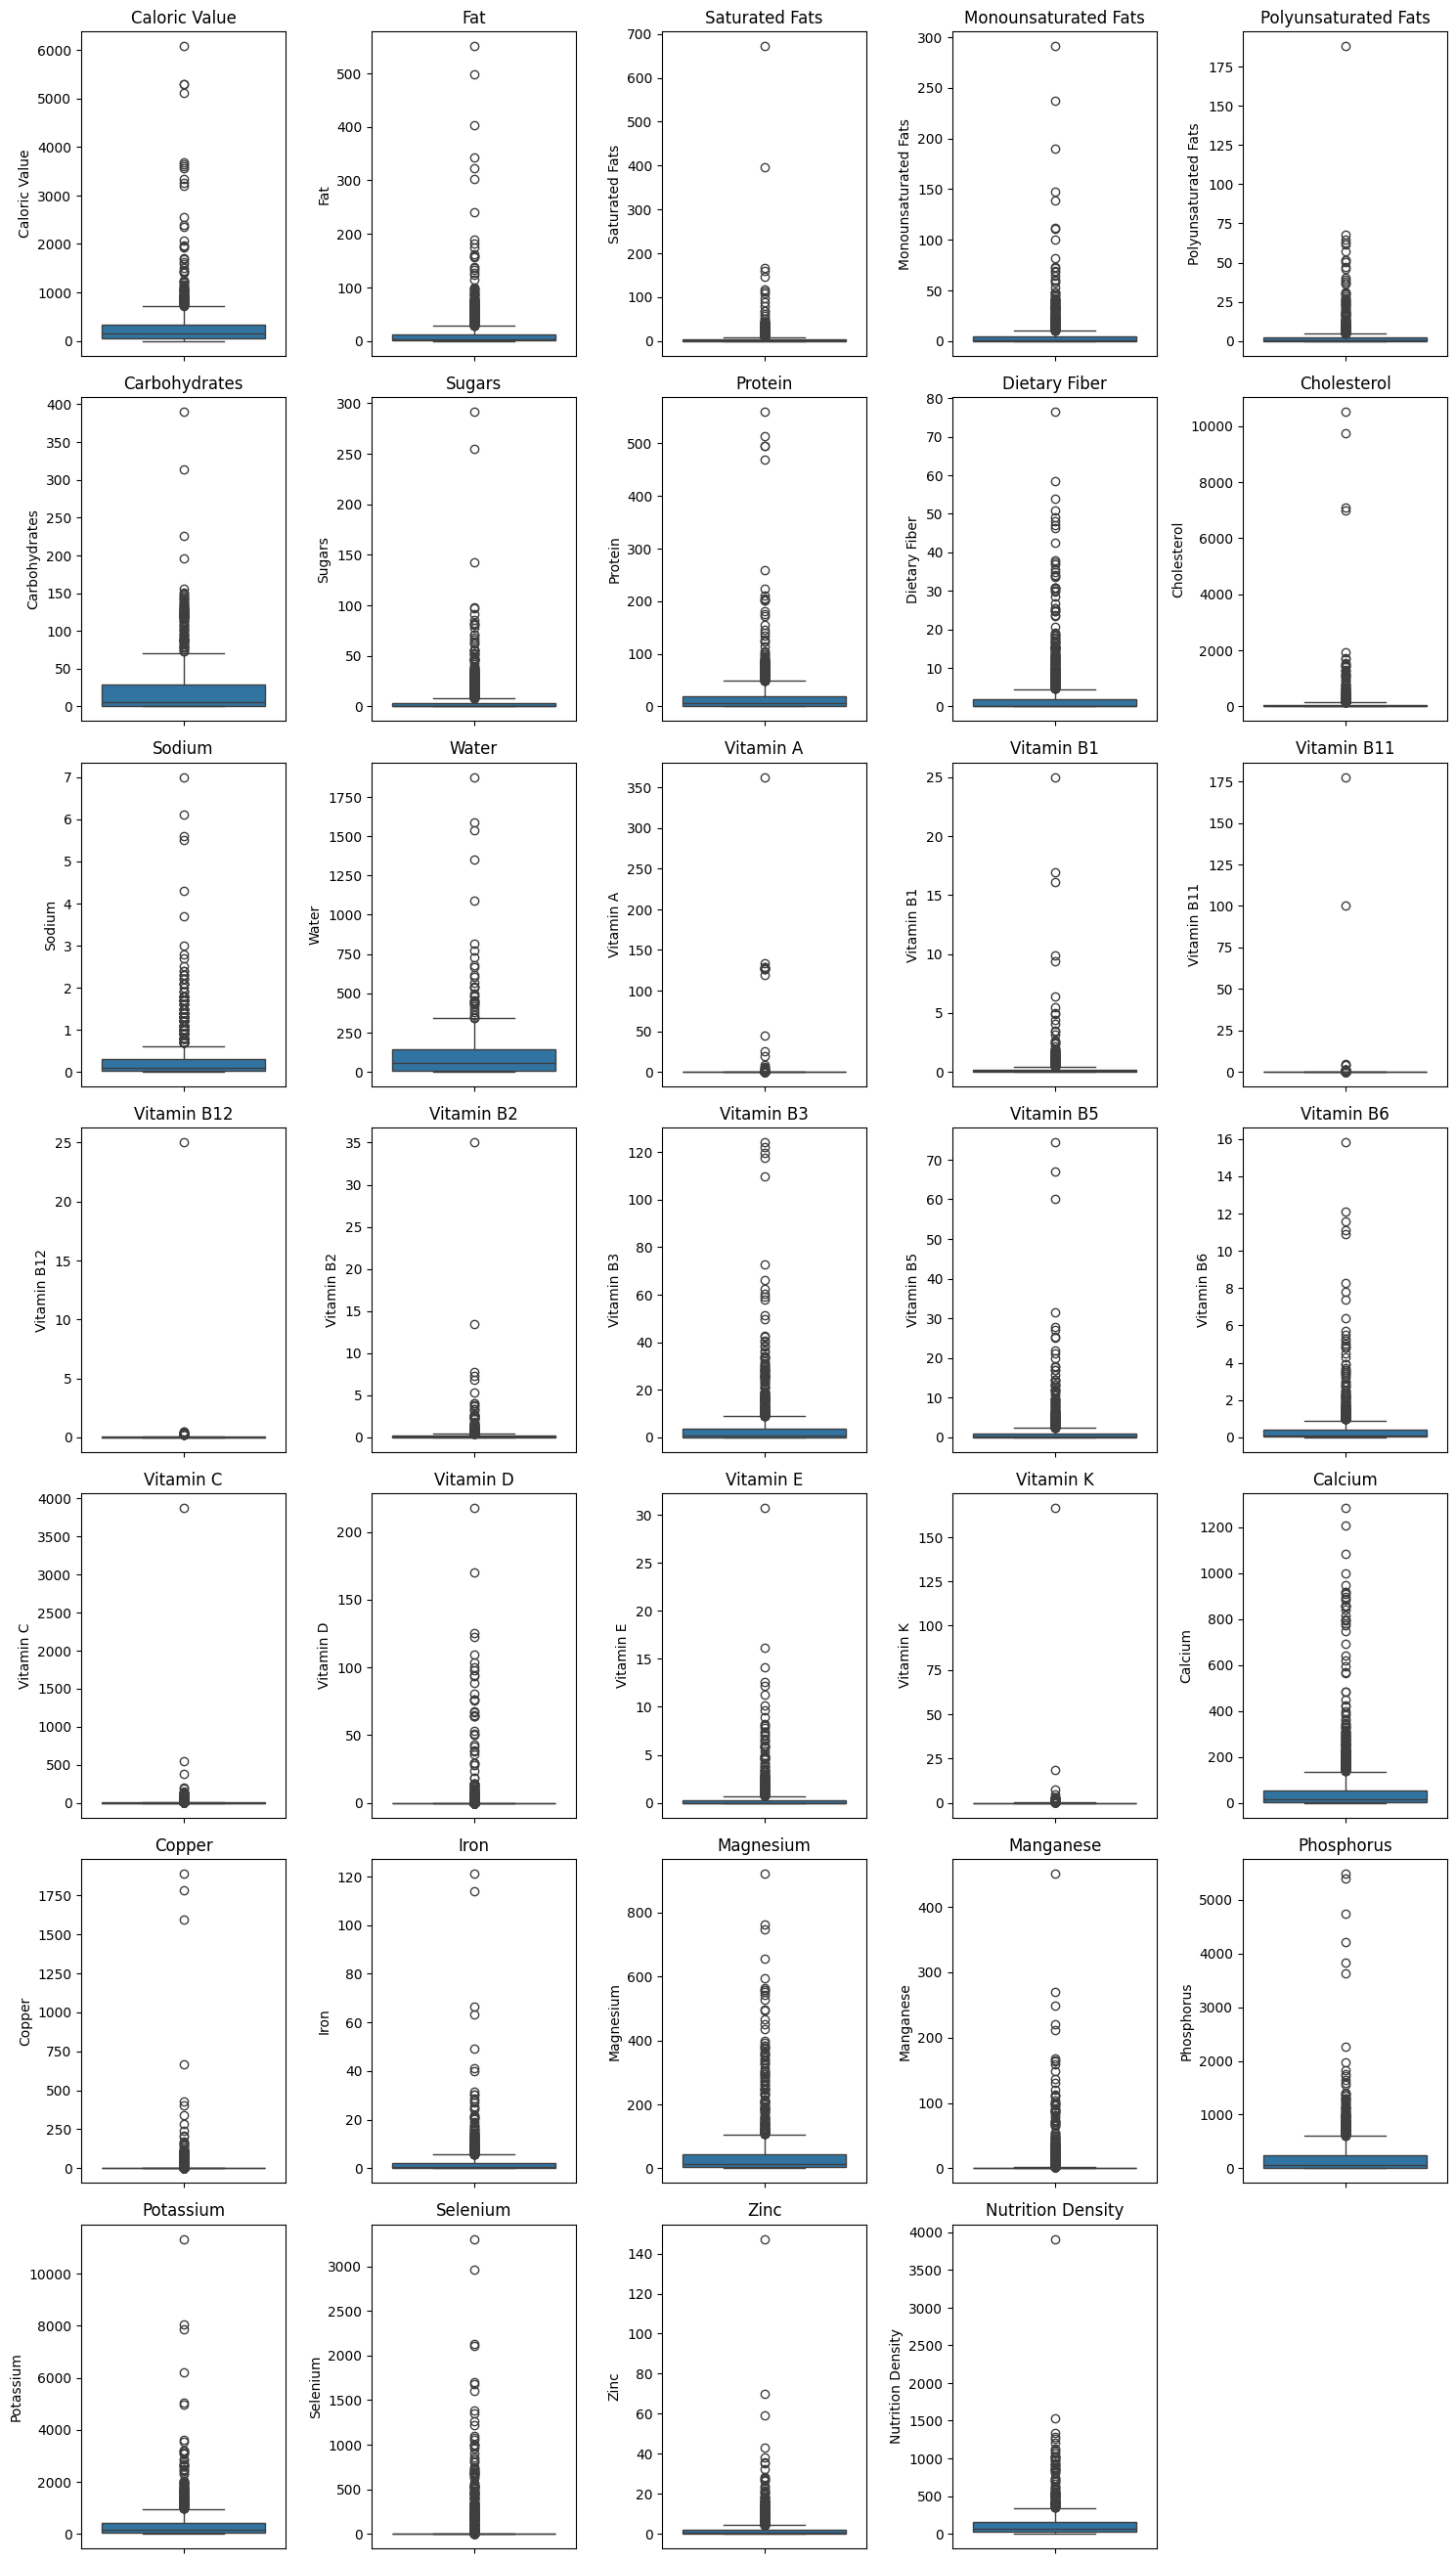

In [23]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 5, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

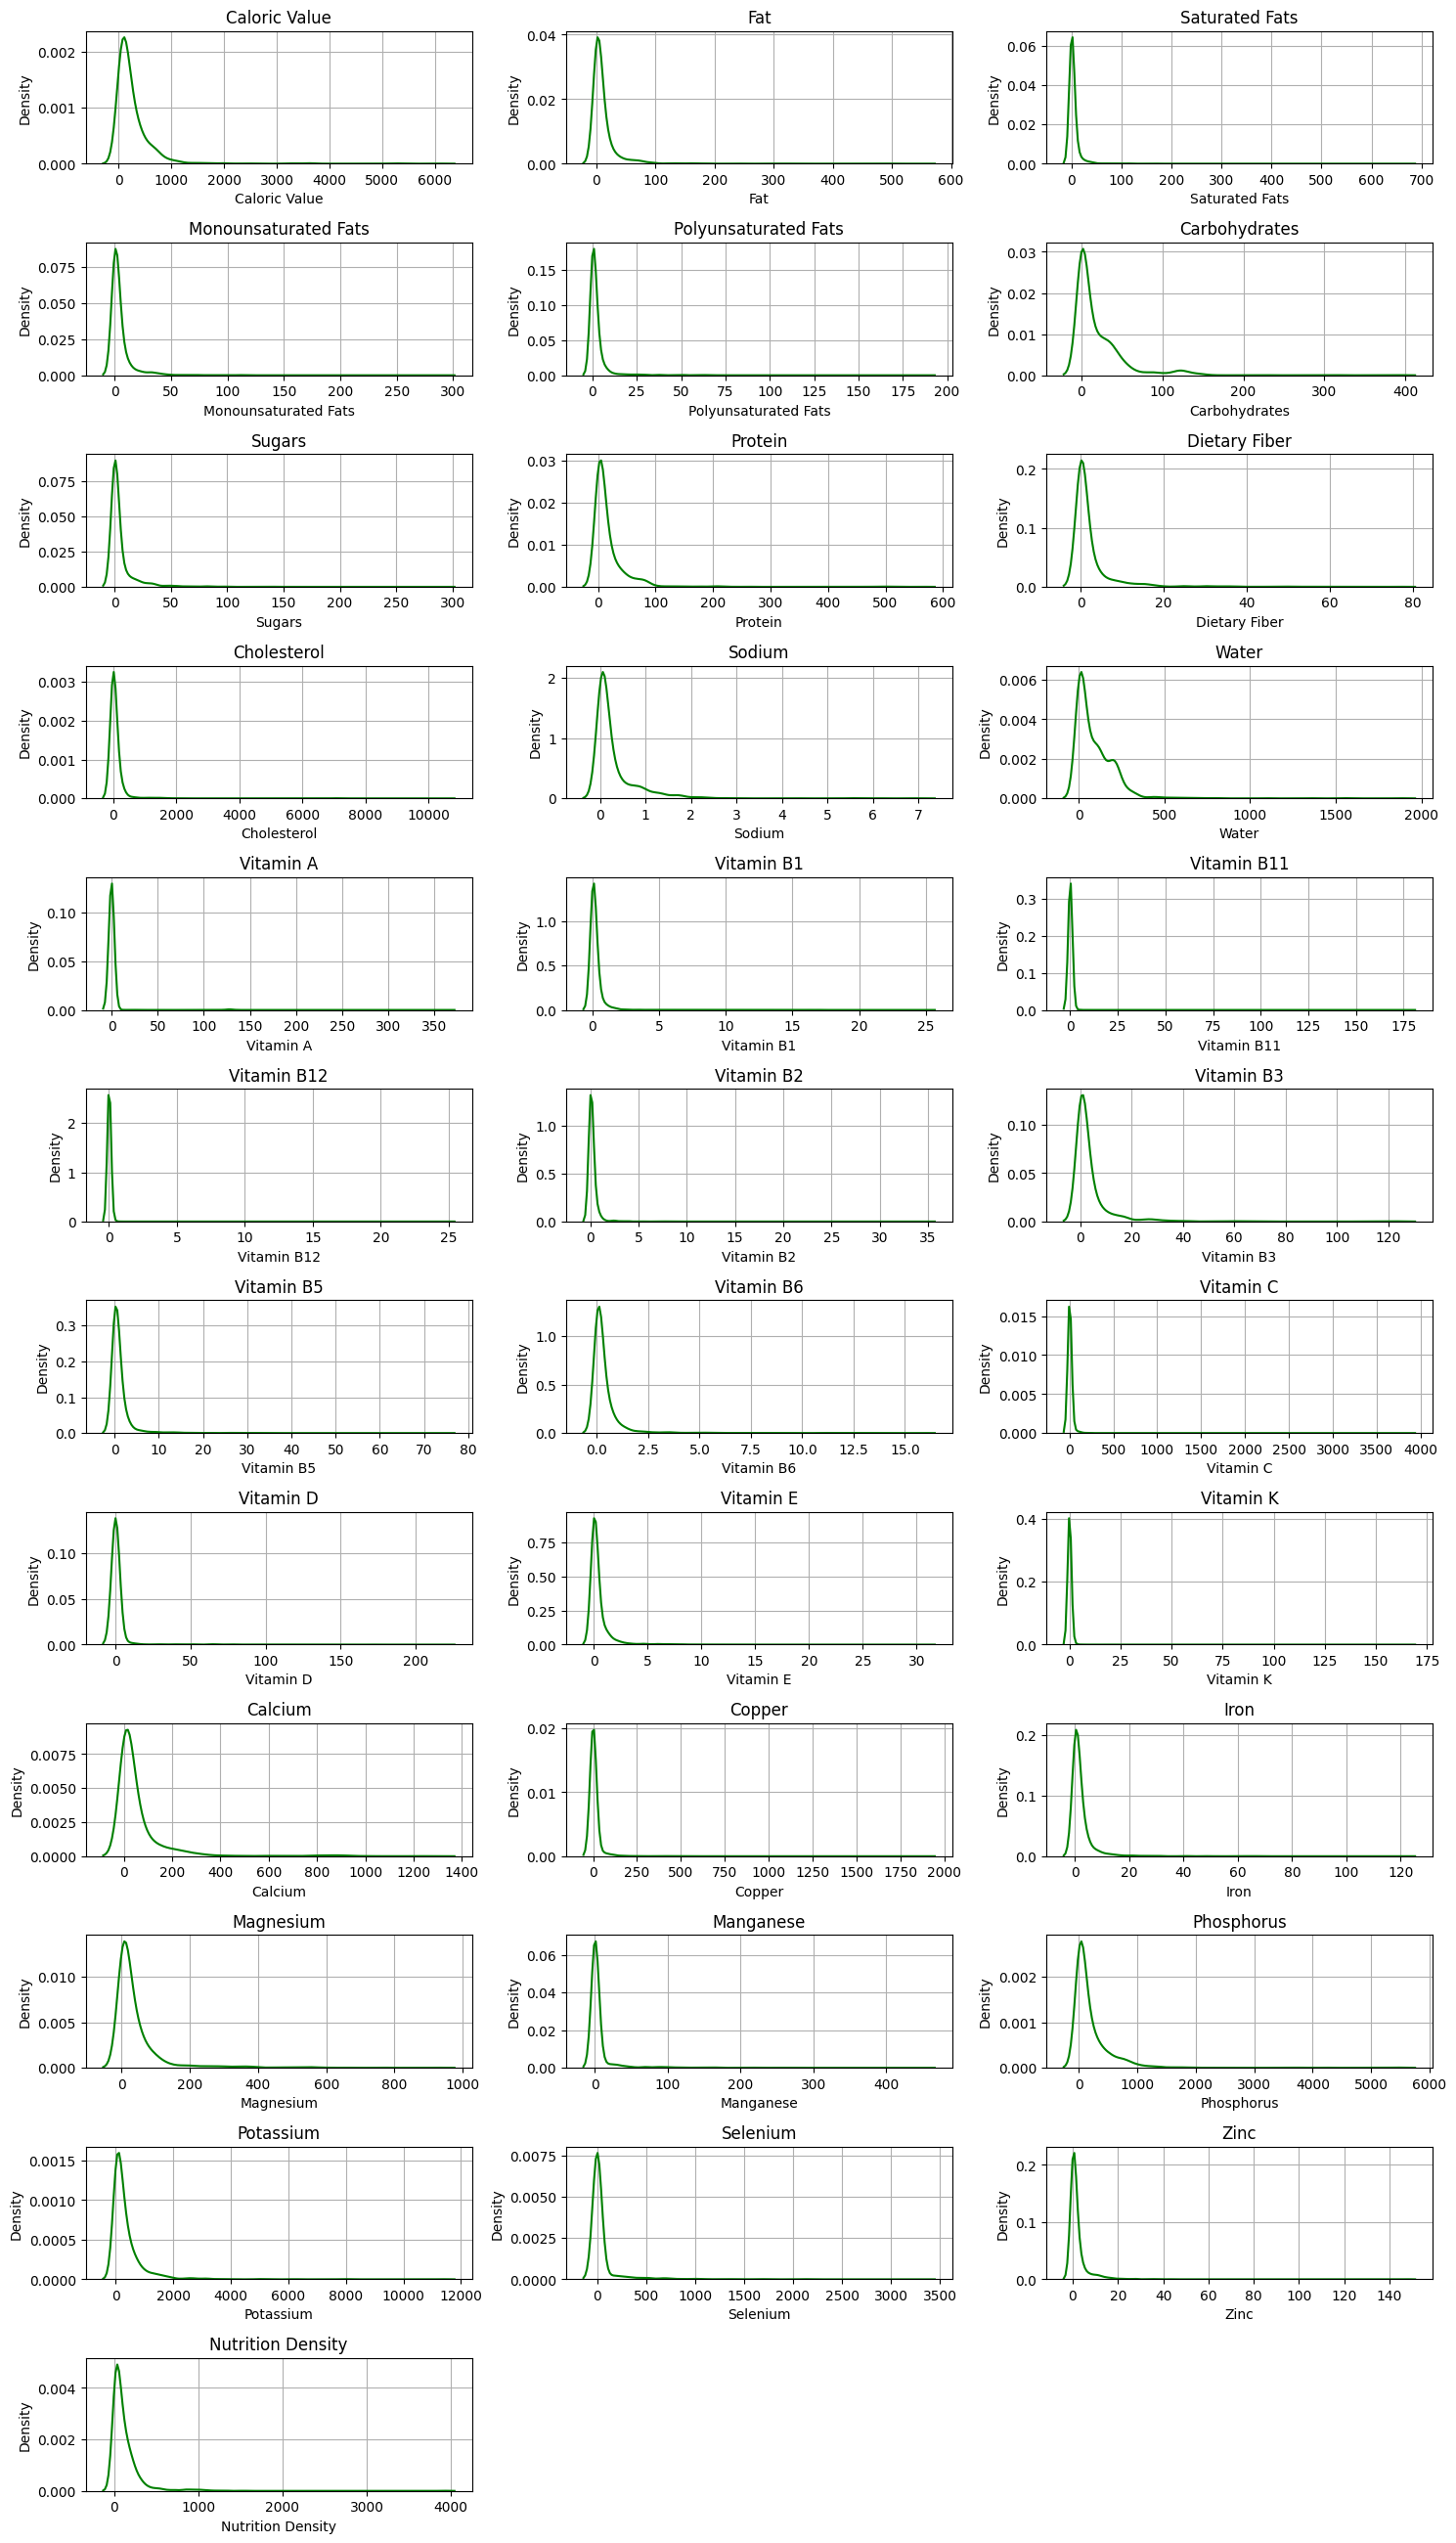

In [24]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(14, 3, i)
    sns.kdeplot(df[column], color="g")
    plt.title(column)
    plt.grid(True)
plt.tight_layout()
plt.show()

,food,Caloric Value
1437,goose meat raw,6077
1374,pork arm picnic raw,5298
1376,pork arm picnic cooked,5292
1430,duck meat raw,5123
1372,pork backfat,3683


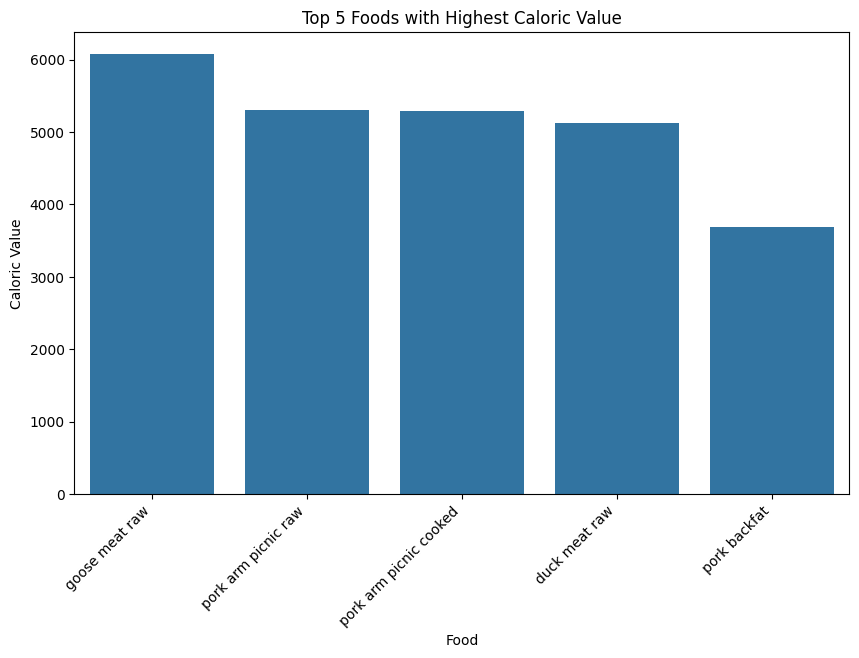

,food,Fat
1437,goose meat raw,550.7
1430,duck meat raw,498.8
1372,pork backfat,402.3
1374,pork arm picnic raw,343.4
1376,pork arm picnic cooked,322.7


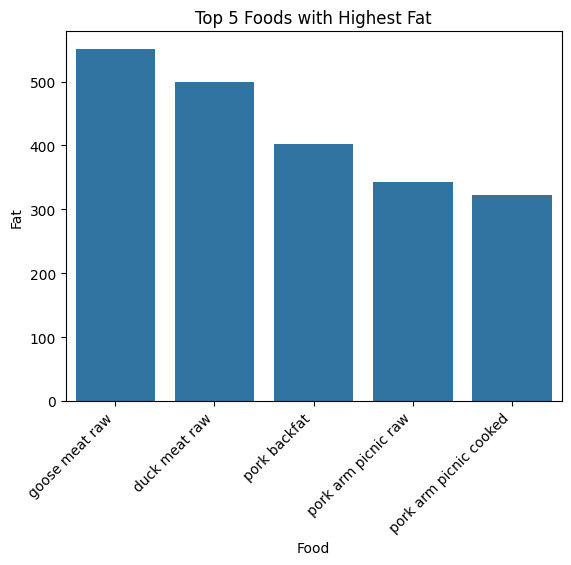

,food,Saturated Fats
999,coconut whole coconut,672.0
781,weetabix weetabix,396.1
1430,duck meat raw,167.6
1437,goose meat raw,160.2
1372,pork backfat,146.1


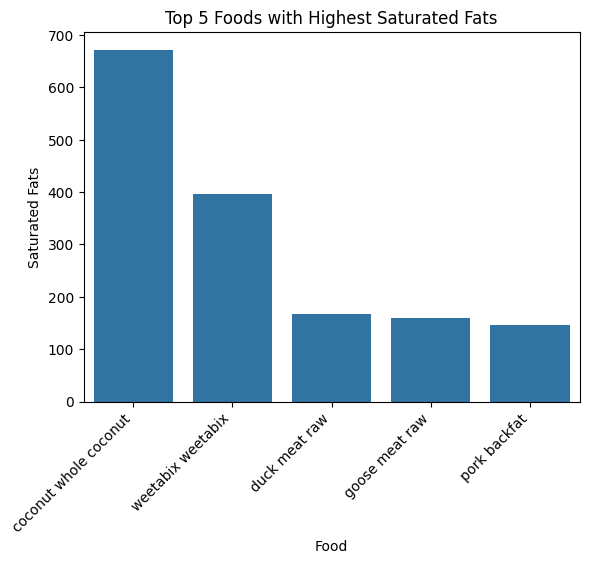

,food,Monounsaturated Fats
1437,goose meat raw,291.1
1430,duck meat raw,237.0
1372,pork backfat,190.3
1374,pork arm picnic raw,147.3
1376,pork arm picnic cooked,139.0


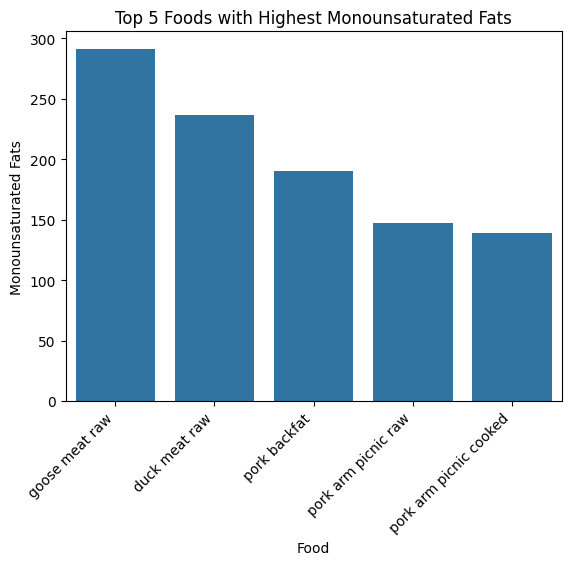

,food,Polyunsaturated Fats
815,honey cereali general mills,188.0
1374,pork arm picnic raw,67.9
1430,duck meat raw,64.4
1376,pork arm picnic cooked,62.7
1437,goose meat raw,61.6


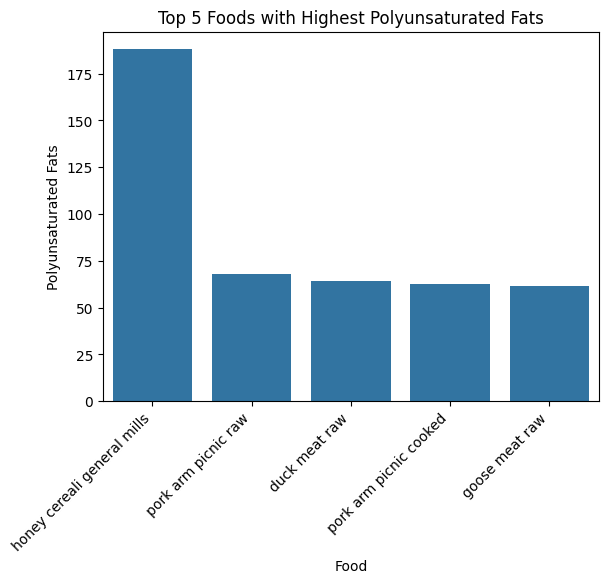

,food,Carbohydrates
707,banana cream pie,390.2
622,vanilla frosting,313.7
625,pineapple topping,225.8
616,white frosting dry,196.4
848,rice pilaf raw,155.7


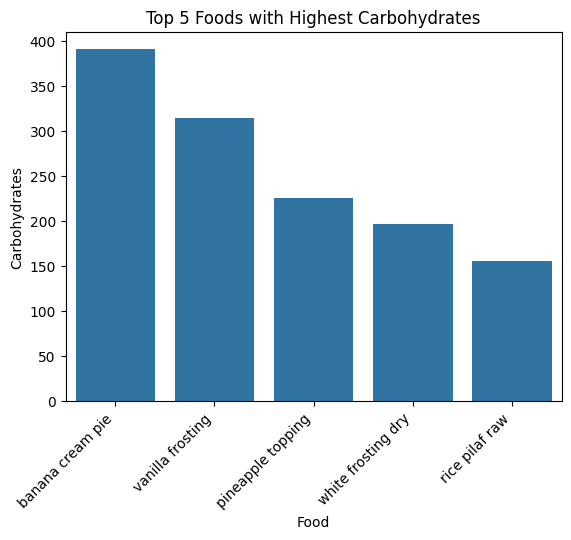

,food,Sugars
622,vanilla frosting,291.5
1466,danone low fat alsafi,255.0
707,banana cream pie,143.0
980,golden raisins,97.7
982,zante currants dried,96.9


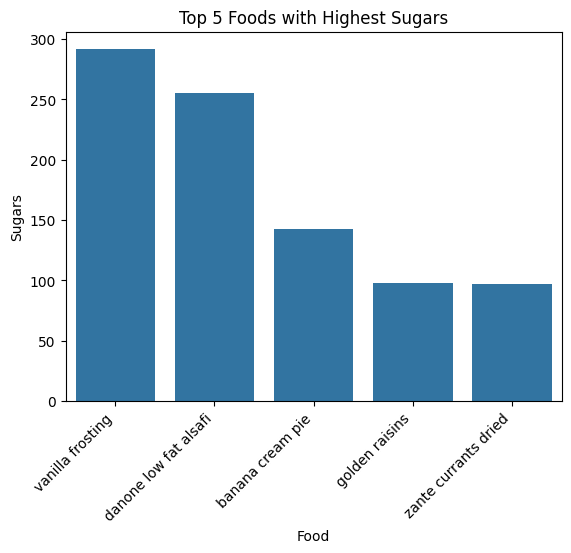

,food,Protein
1376,pork arm picnic cooked,560.3
1374,pork arm picnic raw,513.6
1438,turkey breast roasted,496.1
1406,turkey breast raw,495.6
1339,pork top loin roasts raw,468.4


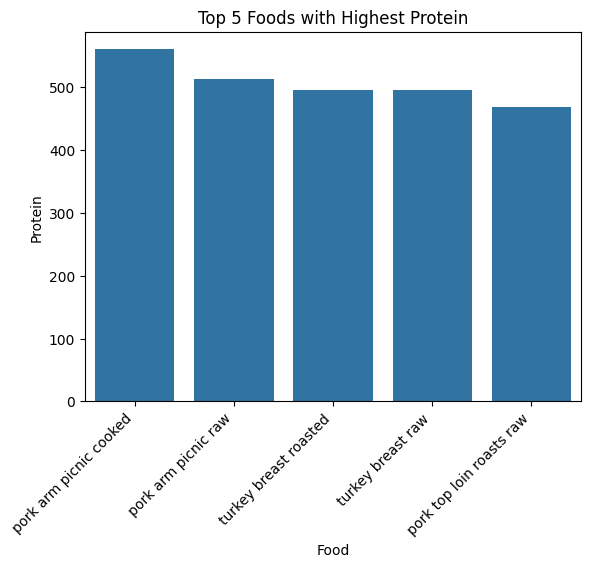

,food,Dietary Fiber
594,dessert wine dry,76.5
1109,lentils raw,58.6
1099,hyacinth beans raw,53.8
1086,navy beans raw,50.8
1107,yellow beans raw,49.2


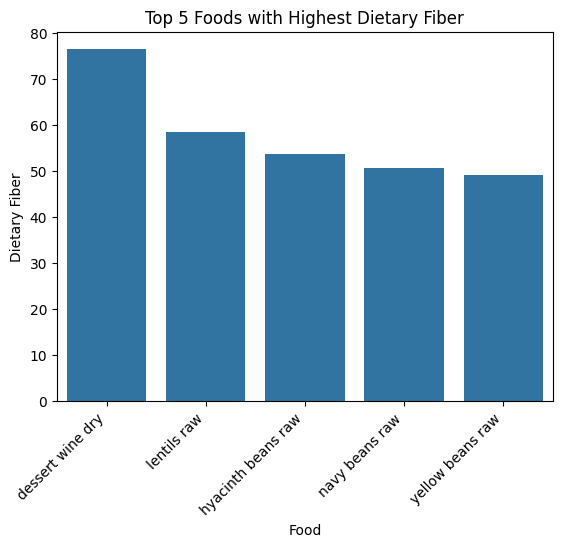

,food,Cholesterol
1294,veal brain cooked,10509.0
1320,pork brain cooked,9748.6
1323,lamb brain cooked,7089.2
1299,beef brain cooked,7002.5
1376,pork arm picnic cooked,1936.7


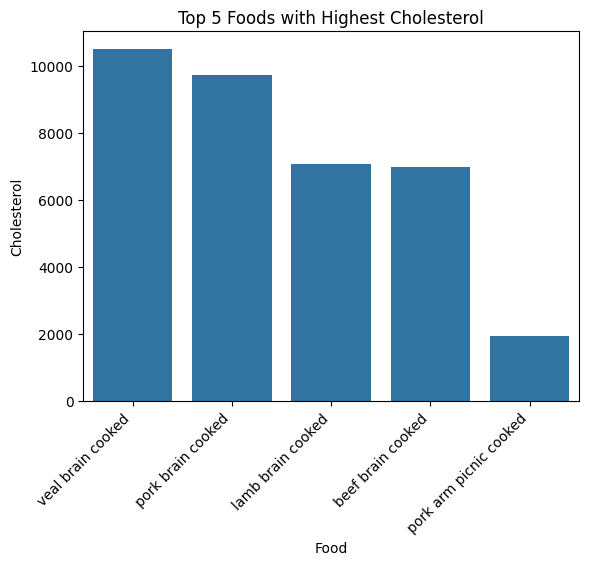

,food,Sodium
1047,salt,7.0
389,salt mackerel,6.1
370,jellyfish dried,5.6
1219,corned beef raw,5.5
1393,pork feet pickled,4.3


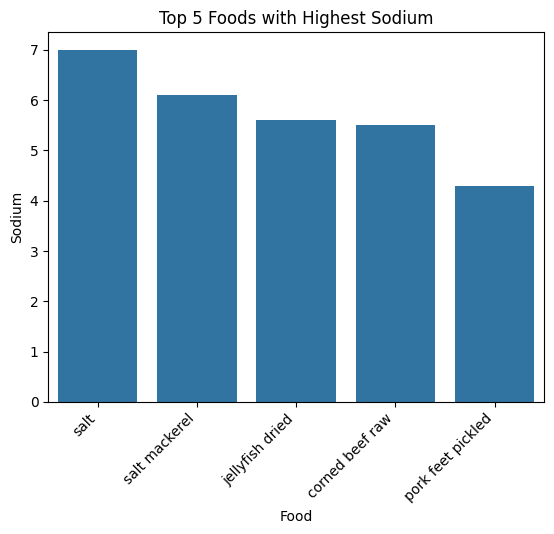

,food,Water
1374,pork arm picnic raw,1875.9
1406,turkey breast raw,1585.9
1339,pork top loin roasts raw,1539.6
1376,pork arm picnic cooked,1351.9
1438,turkey breast roasted,1092.4


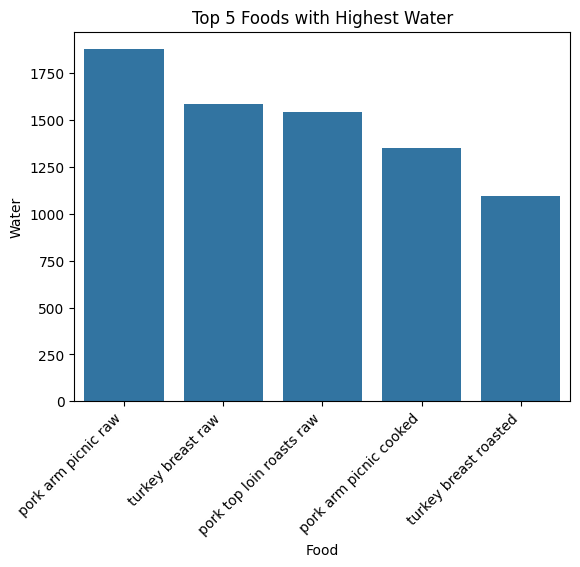

,food,Vitamin A
594,dessert wine dry,362.7
1091,hyacinth beans cooked,134.1
575,muller thurgau white wine,129.2
570,gamay red wine,128.6
593,semillon white wine,128.1


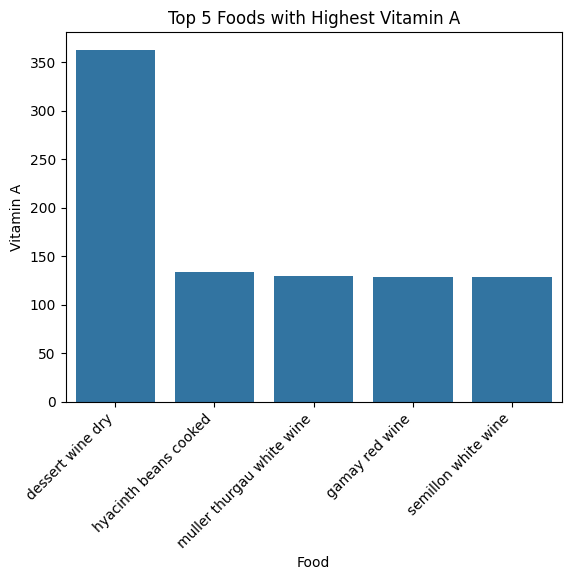

,food,Vitamin B1
1477,smoothie high protein creamy chocolate slimfast,25.0
1332,veal liver cooked,16.9
1374,pork arm picnic raw,16.1
1376,pork arm picnic cooked,9.9
1339,pork top loin roasts raw,9.4


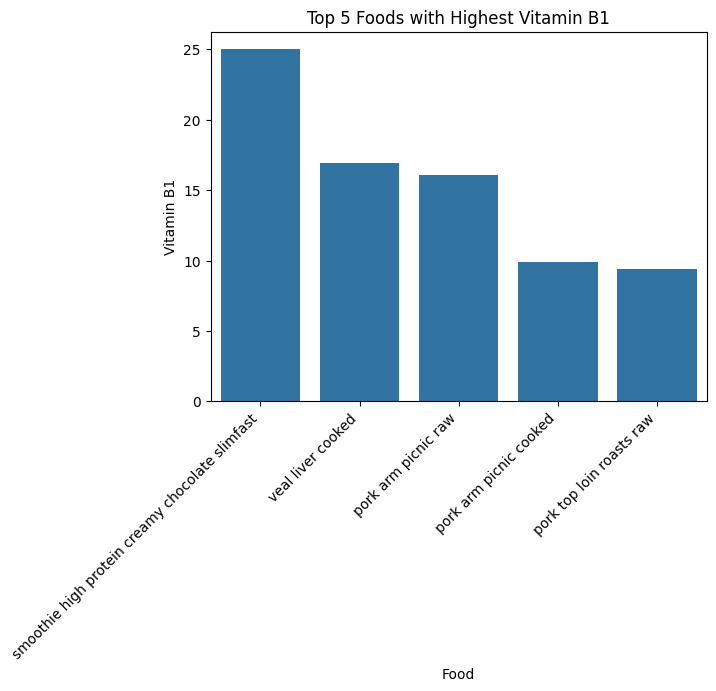

,food,Vitamin B11
1667,muesli with fruit nuts,177.6
1477,smoothie high protein creamy chocolate slimfast,100.0
1395,pork top loin roasts roasted,4.6
1385,pork centre rib roasts roasted,4.1
1389,pork backribs roasted,4.0


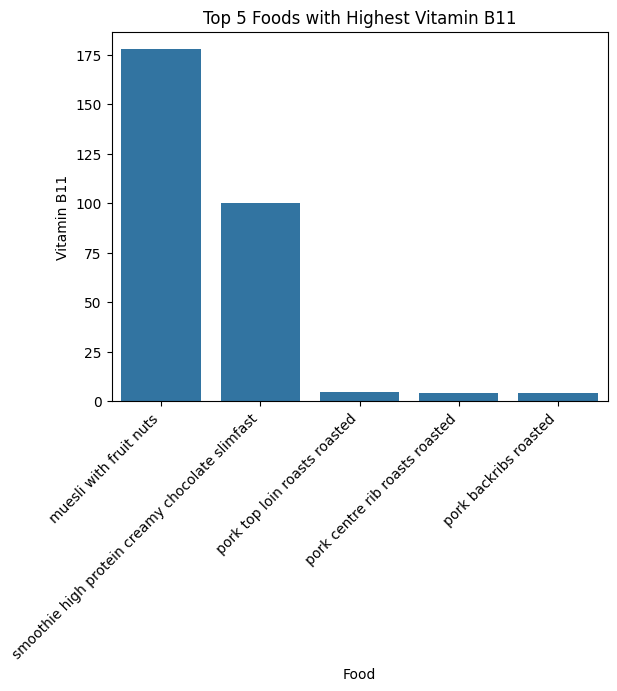

,food,Vitamin B12
1477,smoothie high protein creamy chocolate slimfast,25.0
1089,edamame cooked,0.5
1259,luncheon meat beef,0.5
1669,bran flakes,0.4
319,sandwich with cold cuts,0.4


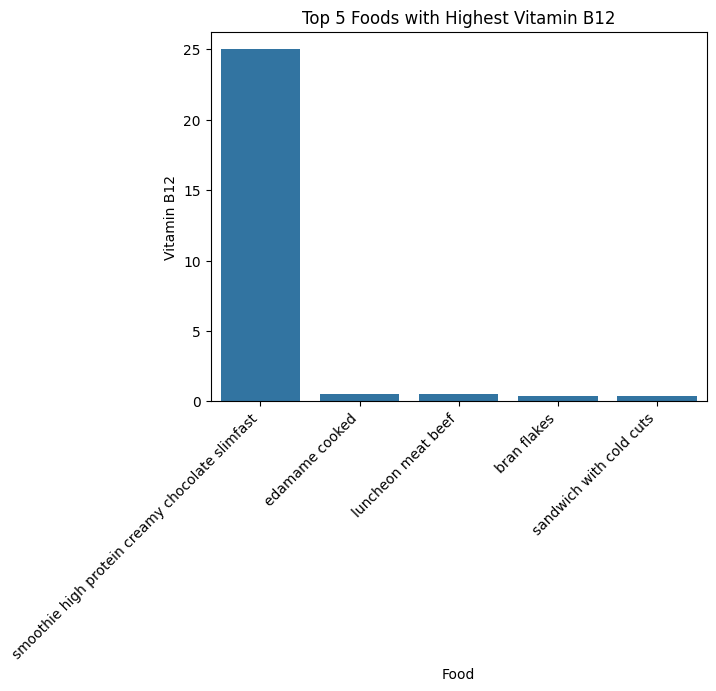

,food,Vitamin B2
1477,smoothie high protein creamy chocolate slimfast,35.0
1314,lamb liver cooked,13.5
1328,pork liver cooked,7.8
1376,pork arm picnic cooked,7.3
1374,pork arm picnic raw,6.8


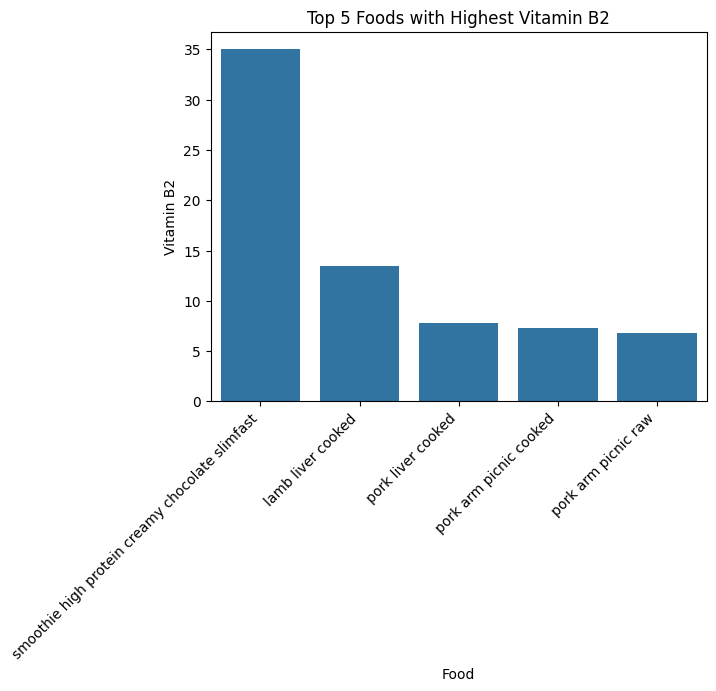

,food,Vitamin B3
1374,pork arm picnic raw,124.0
1339,pork top loin roasts raw,122.2
1376,pork arm picnic cooked,119.5
1406,turkey breast raw,117.7
1438,turkey breast roasted,110.0


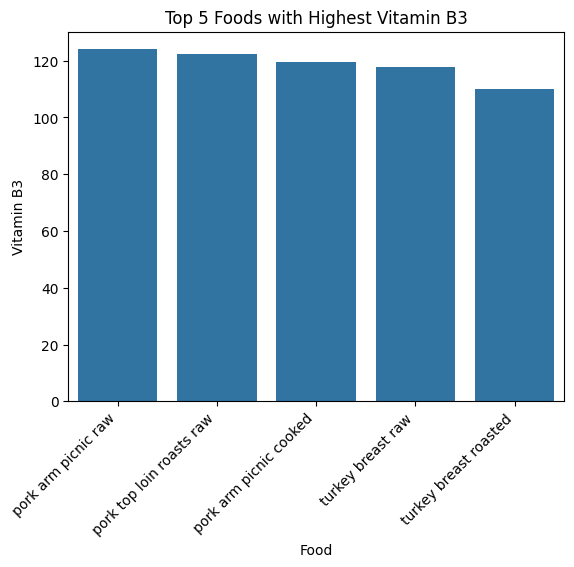

,food,Vitamin B5
1385,pork centre rib roasts roasted,74.3
1389,pork backribs roasted,67.0
1395,pork top loin roasts roasted,60.2
413,sockeye salmon cooked,31.4
1374,pork arm picnic raw,27.9


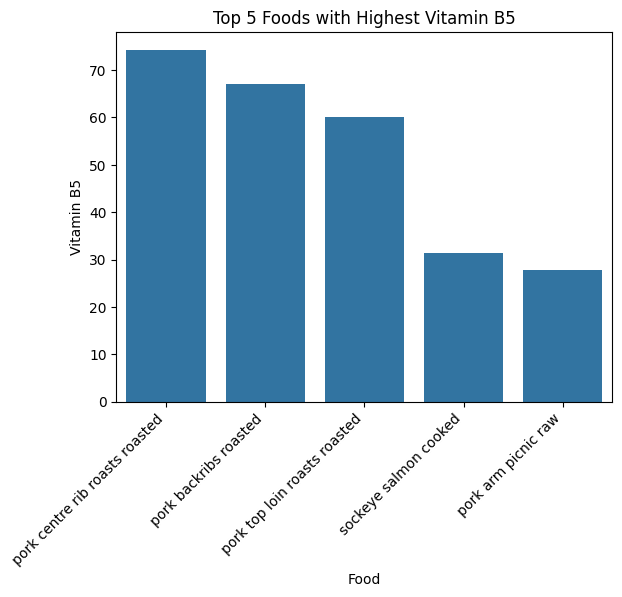

,food,Vitamin B6
1339,pork top loin roasts raw,15.8
1374,pork arm picnic raw,12.1
1385,pork centre rib roasts roasted,11.6
1389,pork backribs roasted,11.1
1406,turkey breast raw,10.9


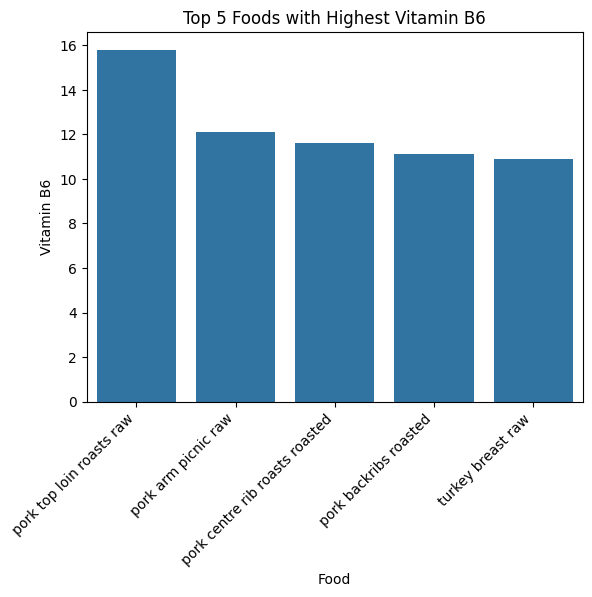

,food,Vitamin C
1543,acerola cherry juice,3872.0
902,rose hips,541.0
910,fruit walnut salad mcdonalds,383.6
916,black currants,202.7
940,apple dippers mcdonalds,188.4


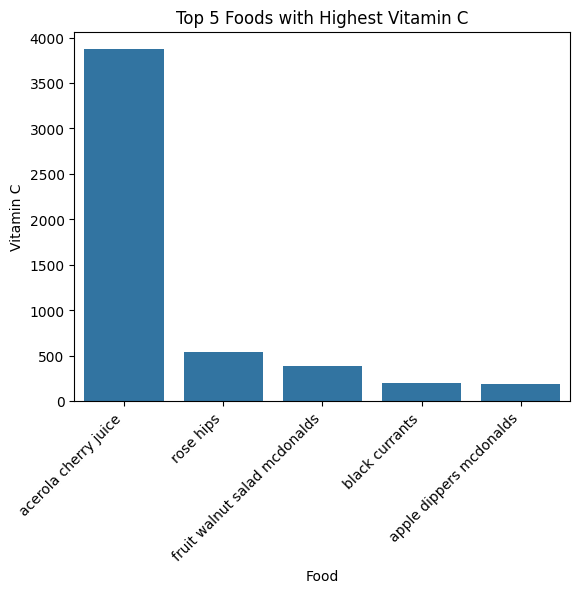

,food,Vitamin D
945,pokeberry shoots raw,217.6
1581,tomato juice,170.3
923,guava,125.6
951,mango,122.3
1510,pineapple juice,109.5


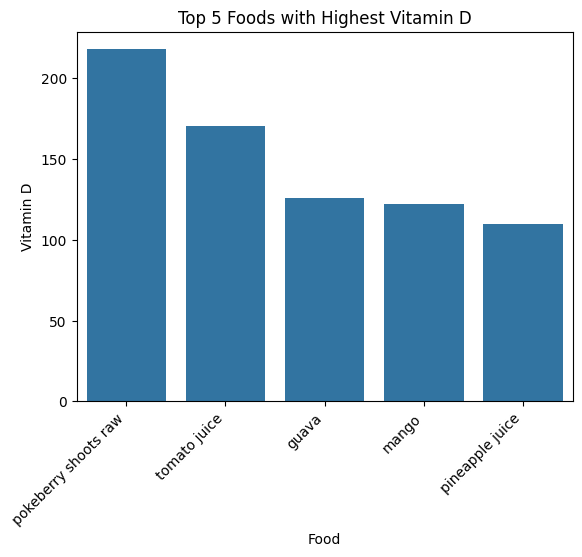

,food,Vitamin E
632,almond paste,30.7
1601,sunflower seeds dried,16.2
417,salmon raw,14.1
1607,pine nuts dried,12.6
1611,peanuts raw,12.2


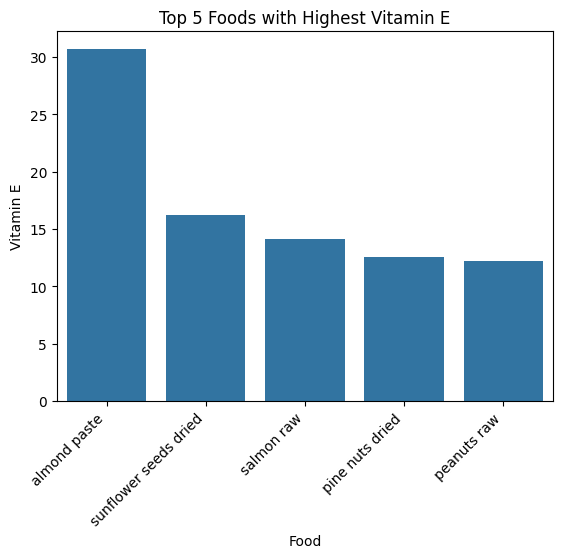

,food,Vitamin K
262,english muffin mcdonalds,166.4
1056,oregano dried,18.3
1068,thyme dried,7.5
124,chicken sandwich,4.5
140,nachos with cheese,3.3


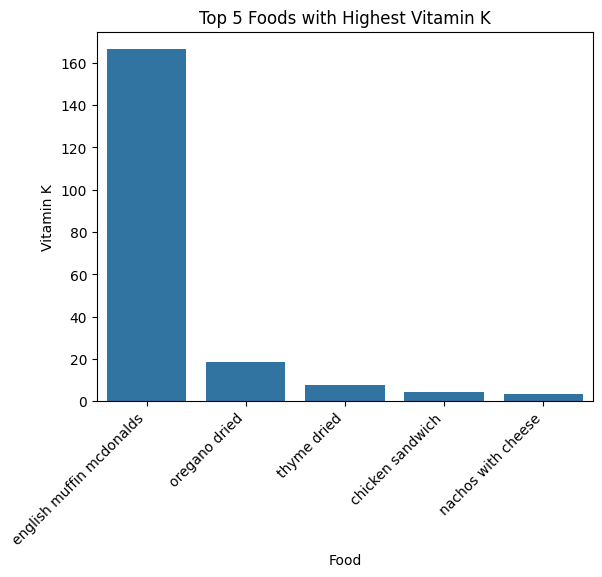

,food,Calcium
35,mexican cheese,1283.5
1634,sisymbrium seeds,1208.4
37,mozzarella cheese fat free,1085.9
38,provolone cheese,997.9
31,muenster cheese,946.4


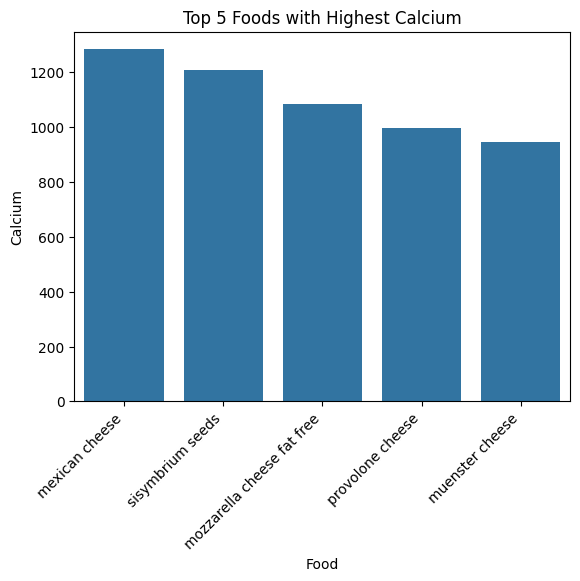

,food,Copper
1068,thyme dried,1890.0
1023,dill weed dried,1784.0
1056,oregano dried,1597.0
319,sandwich with cold cuts,668.6
71,enchilada with cheese,430.2


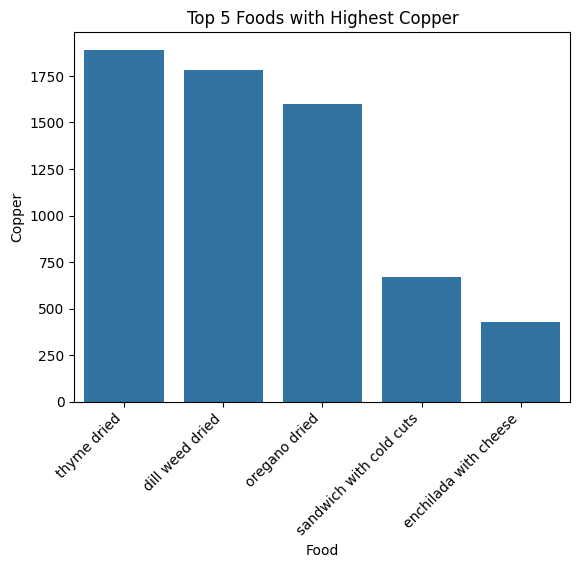

,food,Iron
1306,beef spleen cooked,121.2
1316,lamp spleen cooked,114.1
1358,pork splean cooked,66.5
1328,pork liver cooked,63.4
1333,pork lungs cooked,49.2


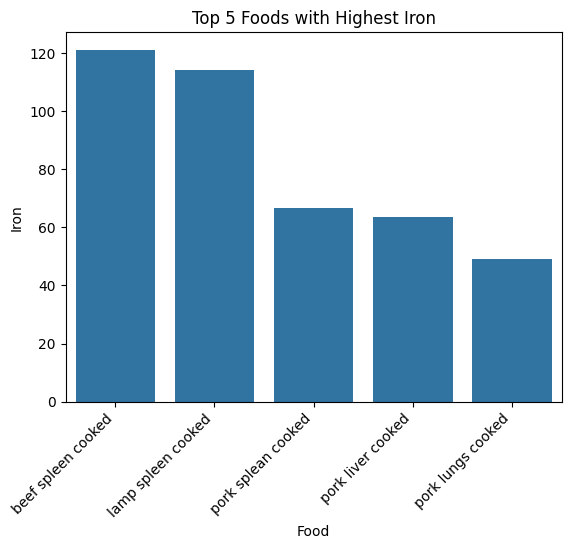

,food,Magnesium
775,rice bran,921.6
1599,pumpkin squash seeds dried,763.7
1126,mothbeans raw,746.8
774,cottonseed kernels roasted,655.6
1099,hyacinth beans raw,594.3


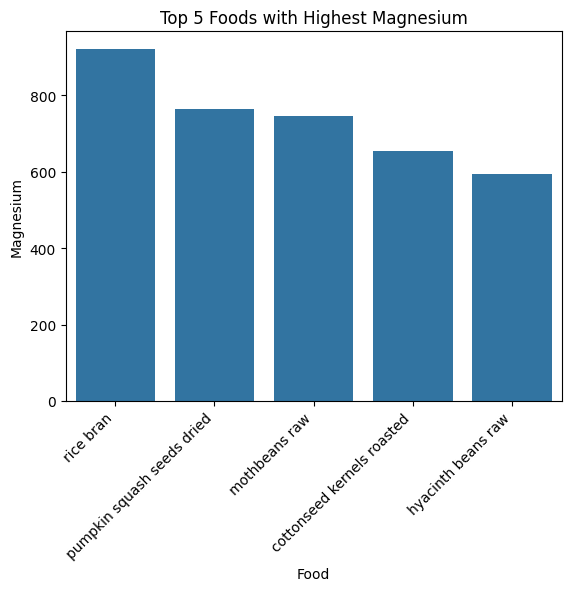

,food,Manganese
1023,dill weed dried,451.0
1056,oregano dried,270.0
808,kamut raw,249.2
1068,thyme dried,220.0
1395,pork top loin roasts roasted,212.0


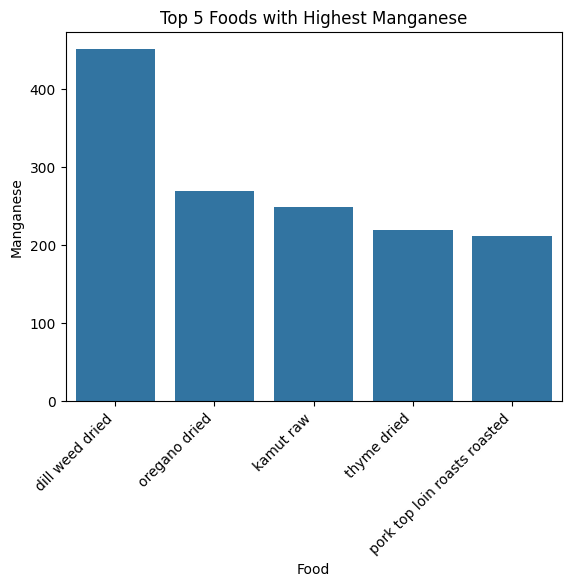

,food,Phosphorus
1374,pork arm picnic raw,5490.0
1376,pork arm picnic cooked,5404.8
1339,pork top loin roasts raw,4741.2
1406,turkey breast raw,4211.0
1437,goose meat raw,3832.9


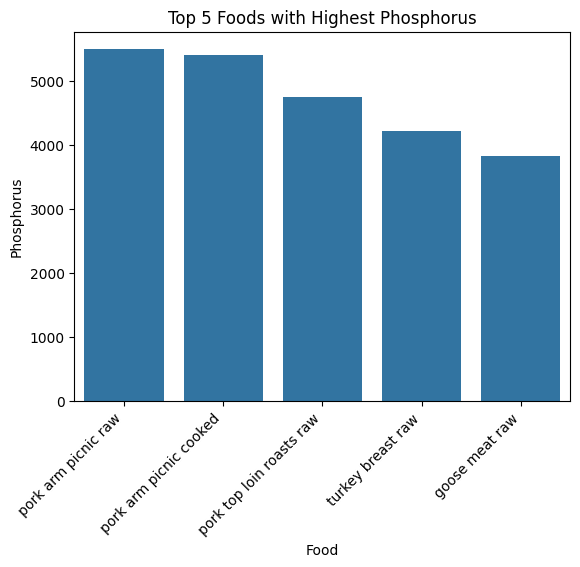

,food,Potassium
1374,pork arm picnic raw,11336.9
1376,pork arm picnic cooked,8039.6
1339,pork top loin roasts raw,7858.1
1406,turkey breast raw,6226.0
1437,goose meat raw,5045.0


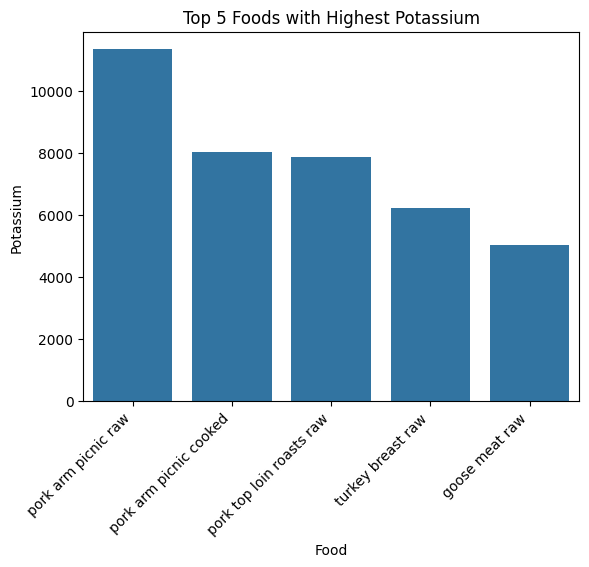

,food,Selenium
1023,dill weed dried,3308.0
1395,pork top loin roasts roasted,2959.5
1385,pork centre rib roasts roasted,2129.8
1389,pork backribs roasted,2107.2
1435,ground chicken cooked,1699.3


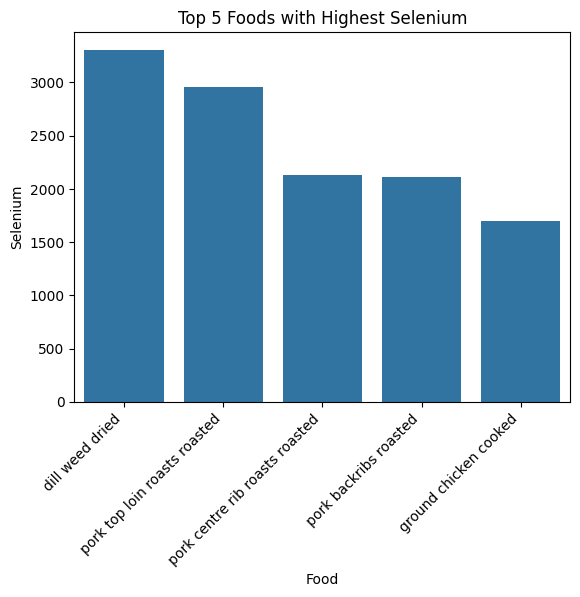

,food,Zinc
501,eastern oyster canned,147.3
1376,pork arm picnic cooked,69.8
1374,pork arm picnic raw,59.0
1214,beef under blade steak raw,42.9
1339,pork top loin roasts raw,38.0


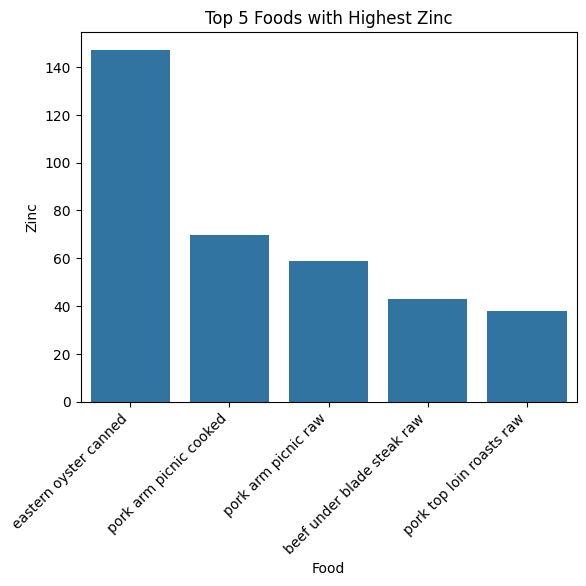

,food,Nutrition Density
1543,acerola cherry juice,3911.400
707,banana cream pie,1533.500
35,mexican cheese,1337.000
1634,sisymbrium seeds,1286.643
1376,pork arm picnic cooked,1264.074


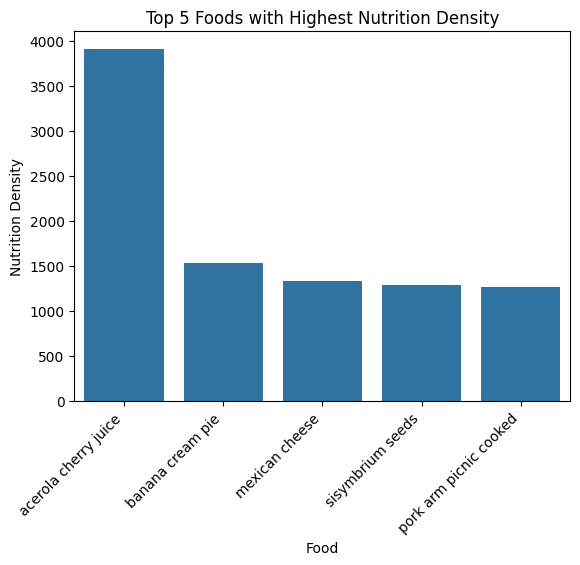

In [25]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(columns_to_plot, 1):
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["food", column]]
    display(temp_df)
    sns.barplot(data=temp_df, x="food", y=column)
    plt.xticks(rotation=45,ha='right',fontsize=10)
    plt.xlabel("Food", fontsize=10)
    plt.ylabel(column, fontsize=10)
    plt.title(f"Top 5 Foods with Highest {column}", fontsize=12)
    plt.show()

In [26]:
df[['Carbohydrates','Sugars']].corr()

,Carbohydrates,Sugars
Carbohydrates,1.000000,0.447268
Sugars,0.447268,1.000000


<Axes: xlabel='Carbohydrates', ylabel='Sugars'>

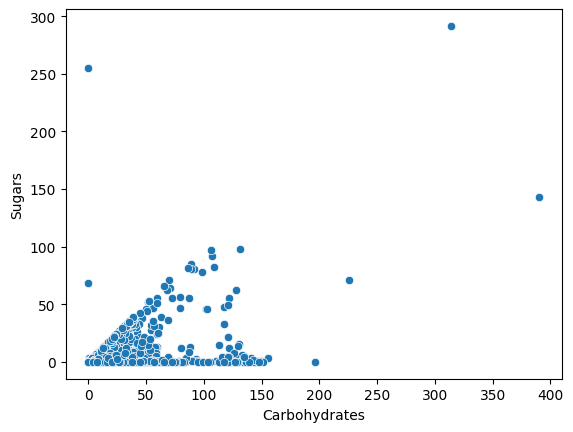

In [27]:
sns.scatterplot(x=df['Carbohydrates'],y=df['Sugars'])

In [28]:
high_carbs_low_sugars = df.sort_values(by='Carbohydrates', ascending=False).head(5)[["food", 'Carbohydrates', 'Sugars']]
high_carbs_low_sugars = high_carbs_low_sugars.sort_values(by='Sugars', ascending=True).head(5)[["food", 'Carbohydrates', 'Sugars']]
high_carbs_low_sugars

,food,Carbohydrates,Sugars
616,white frosting dry,196.4,0.0
848,rice pilaf raw,155.7,3.1
625,pineapple topping,225.8,71.4
707,banana cream pie,390.2,143.0
622,vanilla frosting,313.7,291.5


In [29]:
high_sugars_low_carbs = df.sort_values(by='Sugars', ascending=False).head(5)[["food", 'Sugars', 'Carbohydrates']]
high_sugars_low_carbs = high_sugars_low_carbs.sort_values(by='Carbohydrates', ascending=True).head(5)[["food", 'Sugars', 'Carbohydrates']]
high_sugars_low_carbs

,food,Sugars,Carbohydrates
1466,danone low fat alsafi,255.0,0.089
982,zante currants dried,96.9,106.700
980,golden raisins,97.7,131.200
622,vanilla frosting,291.5,313.700
707,banana cream pie,143.0,390.200


In [30]:
df[['Protein', 'Dietary Fiber']].corr()

,Protein,Dietary Fiber
Protein,1.000000,0.007176
Dietary Fiber,0.007176,1.000000


<Axes: xlabel='Protein', ylabel='Dietary Fiber'>

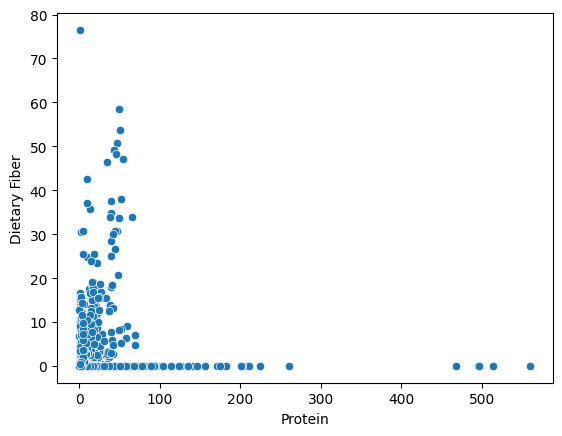

In [31]:
sns.scatterplot(x=df['Protein'],y=df['Dietary Fiber'])

In [32]:
df['Protein_to_Fiber_Ratio'] = df['Protein'] / df['Dietary Fiber']
df['Protein_to_Fiber_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Protein_to_Fiber_Ratio'].fillna(0, inplace=True)

In [34]:
highest_protein_to_fiber_ratio = df.sort_values(by='Protein_to_Fiber_Ratio', ascending=False).head(5)[['food', 'Protein', 'Dietary Fiber', 'Protein_to_Fiber_Ratio']]
highest_protein_to_fiber_ratio

,food,Protein,Dietary Fiber,Protein_to_Fiber_Ratio
496,sardines in tomato sauce canned,18.6,0.009,2066.666667
34,pimento cheese,31.0,0.100,310.000000
1626,studentenfutter alnatura,3.1,0.031,100.000000
1420,chicken drumstick fried,15.8,0.200,79.000000
1244,turkey pastrami,4.6,0.062,74.193548


In [35]:
col=['Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K','Caloric Value']
df[col].corr().tail(1)

,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Caloric Value
Caloric Value,0.005046,0.393758,0.004348,-0.006447,0.303336,0.709698,0.480815,0.647421,-0.00138,-0.057187,0.279522,-0.007443,1.0


In [36]:
high_cholesterol = df.sort_values(by='Cholesterol', ascending=False).head(5)[["food", 'Cholesterol', 'Sodium']]
high_cholesterol_low_sodium = high_cholesterol.sort_values(by='Sodium', ascending=True)
high_cholesterol_low_sodium

,food,Cholesterol,Sodium
1320,pork brain cooked,9748.6,0.3
1294,veal brain cooked,10509.0,0.5
1323,lamb brain cooked,7089.2,0.5
1299,beef brain cooked,7002.5,0.6
1376,pork arm picnic cooked,1936.7,2.2


In [37]:
high_sodium = df.sort_values(by='Sodium', ascending=False).head(5)[["food",'Sodium','Cholesterol']]
high_sodium_low_cholesterol = high_sodium.sort_values(by='Cholesterol', ascending=True)
high_sodium_low_cholesterol

,food,Sodium,Cholesterol
1047,salt,7.0,0.0
370,jellyfish dried,5.6,2.9
389,salt mackerel,6.1,129.2
1219,corned beef raw,5.5,244.9
1393,pork feet pickled,4.3,376.5


In [38]:
high_iron = df.sort_values(by='Iron', ascending=False).head(5)[["food",'Iron','Calcium']]
high_iron_high_calcium= high_iron.sort_values(by='Calcium', ascending=False)
high_iron_high_calcium

,food,Iron,Calcium
1358,pork splean cooked,66.5,38.9
1316,lamp spleen cooked,114.1,38.4
1306,beef spleen cooked,121.2,37.0
1328,pork liver cooked,63.4,35.4
1333,pork lungs cooked,49.2,24.0


In [39]:
high_zinc = df.sort_values(by='Zinc', ascending=False).head(5)[["food",'Zinc','Vitamin C']]
high_zinc_high_vitamin_C= high_zinc.sort_values(by='Vitamin C', ascending=False)
high_zinc_high_vitamin_C

,food,Zinc,Vitamin C
501,eastern oyster canned,147.3,8.1
1376,pork arm picnic cooked,69.8,0.0
1374,pork arm picnic raw,59.0,0.0
1214,beef under blade steak raw,42.9,0.0
1339,pork top loin roasts raw,38.0,0.0


In [40]:
columns = [
    'food',
    'Carbohydrates',
    'Protein',
    'Fat',
    'Caloric Value',
    'Nutrition Density',
    'Vitamin A',
    'Vitamin B1',
    'Vitamin B6',
    'Vitamin B12',
    'Vitamin C',
    'Vitamin D',
    'Calcium',
    'Iron',
    'Magnesium',
    'Zinc'
]

In [41]:
df=df[columns]

In [42]:
df.head(1)

,food,Carbohydrates,Protein,Fat,Caloric Value,Nutrition Density,Vitamin A,Vitamin B1,Vitamin B6,Vitamin B12,Vitamin C,Vitamin D,Calcium,Iron,Magnesium,Zinc
0,cream cheese,0.8,0.9,5.0,51,7.07,0.2,0.033,0.096,0.092,0.004,0.0,0.008,0.082,0.027,0.039


In [43]:
def recommend_foods(high_columns, low_columns, exclude_columns):
    recommended_foods = pd.DataFrame()

    # Process high columns
    for col in high_columns:
        if col in df.columns:
            filtered_high = df.sort_values(by=col, ascending=False).head(5)
            recommended_foods = pd.concat([recommended_foods, filtered_high]).drop_duplicates()

    # Process low columns
    for col in low_columns:
        if col in df.columns:
            filtered_low = df.sort_values(by=col, ascending=True).head(5)
            recommended_foods = pd.concat([recommended_foods, filtered_low]).drop_duplicates()

    # Drop excluded columns
    if exclude_columns:
        recommended_foods = recommended_foods.drop(columns=exclude_columns, errors='ignore')

    return recommended_foods

In [44]:
high_columns = ['Protein', 'Caloric Value', 'Nutrition Density',
                'Vitamin A', 'Vitamin B1', 'Vitamin B6', 'Vitamin B12',
                'Vitamin C', 'Vitamin D', 'Calcium', 'Iron', 'Magnesium', 'Zinc']
low_columns = ['Carbohydrates',]
exclude_columns = ['Fat']

recommended_foods = recommend_foods(high_columns, low_columns, exclude_columns)
display(recommended_foods)

,food,Carbohydrates,Protein,Caloric Value,Nutrition Density,Vitamin A,Vitamin B1,Vitamin B6,Vitamin B12,Vitamin C,Vitamin D,Calcium,Iron,Magnesium,Zinc
1376,pork arm picnic cooked,0.0,560.3,5292,1264.074,0.007,9.900,7.800,0.086,0.000,0.062,360.300,20.700,495.4,69.800
1374,pork arm picnic raw,0.0,513.6,5298,1202.100,0.100,16.100,12.100,0.040,0.000,0.064,329.400,15.600,494.1,59.000
1438,turkey breast roasted,0.0,496.1,3266,1011.200,0.000,1.000,8.300,0.004,0.000,0.000,362.900,24.200,466.6,35.100
1406,turkey breast raw,0.0,495.6,3554,976.092,0.015,1.300,10.900,0.004,0.000,0.000,294.300,27.200,543.4,35.500
1339,pork top loin roasts raw,0.0,468.4,3644,816.574,0.090,9.400,15.800,0.075,0.000,0.042,153.700,11.600,526.8,38.000
1437,goose meat raw,0.0,259.8,6077,1117.200,0.300,1.400,6.400,0.049,68.800,0.000,196.600,41.000,294.8,28.200
1430,duck meat raw,0.0,145.7,5123,850.500,0.600,2.500,2.400,0.048,35.500,0.088,139.500,30.400,190.2,17.200
1372,pork backfat,0.0,13.2,3683,425.932,0.032,0.400,0.200,0.035,0.500,0.003,9.100,0.800,9.1,1.700
1543,acerola cherry juice,11.6,1.0,56,3911.400,0.000,0.067,0.051,0.000,3872.000,0.000,24.200,1.200,29.0,0.200
707,banana cream pie,390.2,52.2,3190,1533.500,0.700,1.600,1.600,0.006,19.000,0.009,889.500,12.300,189.8,5.700
